<a href="https://colab.research.google.com/github/Harman2607/psicov/blob/master/psicov2_Harman.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Clone the entire repo.
!git clone -l -s https://github.com/Harman2607/psicov.git cloned-repo
%cd cloned-repo
!ls

Cloning into 'cloned-repo'...
remote: Enumerating objects: 6, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 19 (delta 0), reused 4 (delta 0), pack-reused 13
Unpacking objects: 100% (19/19), done.
/content/cloned-repo
bin  CHANGELOG	demo.aln  demo.observed  demo.pdb  LICENSE  README  src


In [2]:
%%script bash
ls
cd src
echo '-------------------------'
ls
gcc -O3 -march=native -ffast-math -m64 -ftree-vectorize -fopenmp psicov2.c -lm -o psicov
./psicov -p -d 0.03 demo.aln > output

bin
CHANGELOG
demo.aln
demo.observed
demo.pdb
LICENSE
README
src
-------------------------
demo.aln
demo_small.aln
Makefile
psicov2.c


PRINTING 100 Lines of the generated file(matrix)

In [50]:
%%script bash
ls
cd src
echo '---------------------'
ls
head -1 ./covariancematrix.txt
# cat ./output

covariancematrix.txt
demo.aln
demo_small.aln
Makefile
output
psicov
psicov2.c
---------------------
covariancematrix.txt
demo.aln
demo_small.aln
Makefile
output
psicov
psicov2.c
0.000056 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000003 0.000002 0.000002 0.000002 0.000003 0.000002 0.000002 0.000003 0.000003 0.000003 0.000003 0.000002 0.000003 0.000003 0.000003 0.000002 0.000003 0.000003 0.000003 0.000003 -0.000049 0.000002 0.000001 0.000002 0.000002 0.000003 0.000001 0.000001 0.000003 0.000002 0.000003 0.000003 -0.000000 0.000003 0.000003 0.000003 0.000001 0.000002 0.000003 0.000003 0.000003 -0.000039 0.000001 0.000000 0.000001 0.000001 0.000003 0.000001 0.000002 0.000001 0.000002 0.000003 0.000002 -0.000002 0.000002 0.000003 -0.000001 0.000001 0.000001 0.000003 0.000003 0.000002 -0.000030 -0.000001 0.000001 0.000002 0.000003 0.000002 0.000002 0.000

bash: line 2: cd: src: No such file or directory


In [20]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
covariancematrix = np.loadtxt('covariancematrix.txt' , dtype = 'd', delimiter = ' ')
print(covariancematrix[0:10])
print(np.amax(covariancematrix))

[[ 5.6e-05  0.0e+00  0.0e+00 ...  3.0e-06  3.0e-06 -5.3e-05]
 [ 0.0e+00  5.5e-05  0.0e+00 ...  3.0e-06  3.0e-06 -5.3e-05]
 [ 0.0e+00  0.0e+00  5.5e-05 ...  3.0e-06  3.0e-06 -5.3e-05]
 ...
 [ 0.0e+00  0.0e+00  0.0e+00 ...  3.0e-06  3.0e-06 -5.3e-05]
 [ 0.0e+00  0.0e+00  0.0e+00 ...  3.0e-06  3.0e-06 -5.3e-05]
 [ 0.0e+00  0.0e+00  0.0e+00 ...  3.0e-06  3.0e-06 -5.3e-05]]
0.249935


<function matplotlib.pyplot.show>

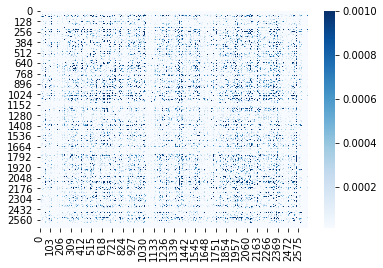

In [42]:
heatmap = sb.heatmap(covariancematrix, 0.00001 , 0.001 , cmap ='Blues')
plt.show

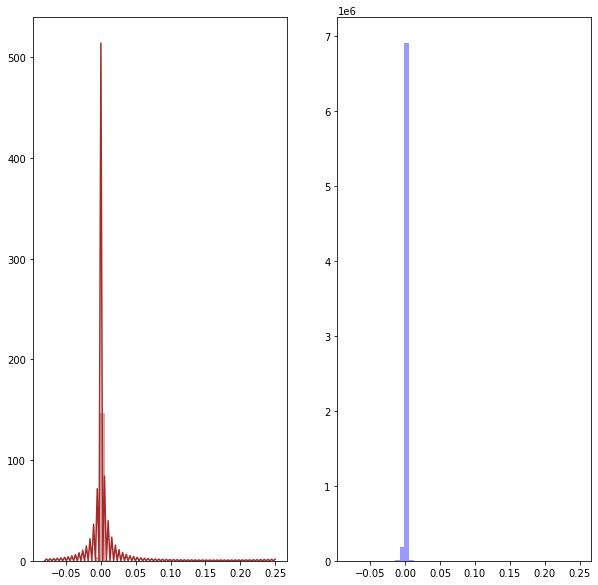

In [48]:
f, axes = plt.subplots(1,2, figsize =(10,10))
# With Kernal Estimation
sb.distplot(covariancematrix, color = 'brown', ax = axes[0])

# Without Kernal estimation
sb.distplot(covariancematrix, kde =False,color = 'blue', ax =axes[1])
